### Simulation

In [29]:
from bmc.simulate import simulate
import numpy as np
import matplotlib.pyplot as plt

In [30]:
low = -20e-6
high = 20e-6 
n_iso = 10000
z_pos = np.linspace(low, high, n_iso)
z_pos = np.append(z_pos, 0)
z_pos = np.sort(z_pos)
# z_pos = np.random.permutation(z_pos)

In [31]:
seq_path_gauss = 'seq_lib/10_ETM.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 20e-3
retun_zmag = False
show_plot = False
n_backlog = 3 #'ALL'
webhook = False
plt_range = [0, 4]
iso_select = [-5,0,5]

In [32]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 7/7 [02:29<00:00, 21.42s/it]

['gz at 0.0000s', 'rf at 0.0800s', 'gz at 0.0820s', 'adc at 0.0825s']


In [10]:
# sim.print_params()

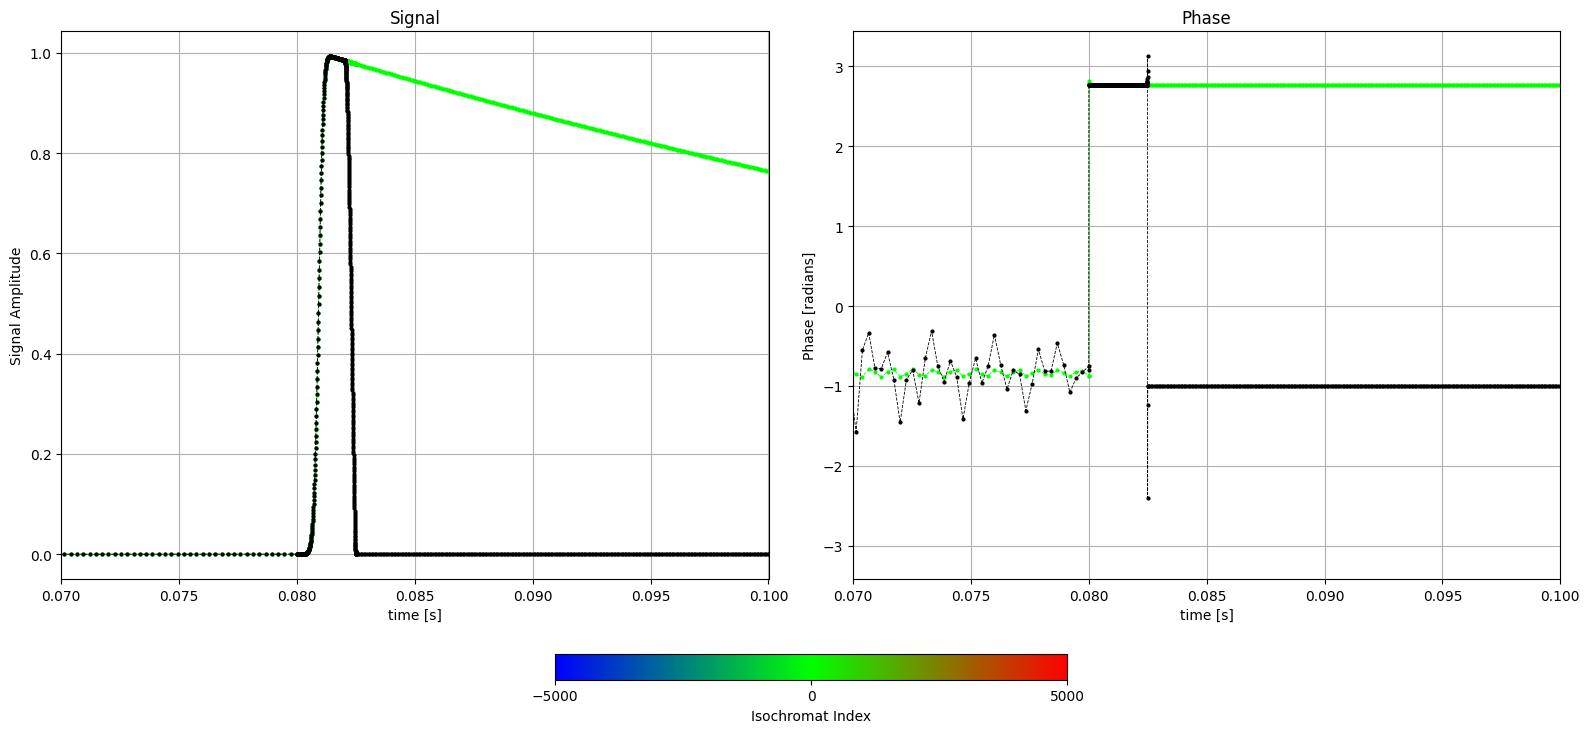

In [34]:
# %matplotlib widget
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag(return_cest_pool=False)

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.1250, 0.141] #10ETM
# plt_range = [0.0675, 0.09]
# plt_range = [0.08, 0.1]
plt_range = [0.07, 0.1]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_plus = np.abs(m_c_total)[-900:]
m_z_plus = m_z_total


### Animation

In [12]:
run_time = .1
track_path = True
ie = False
timing = False
total_mag = False
animate_cest = False
kwargs = {'quality': '-ql', 'write': '--write_to_movie'}  #--write_to_movie

In [13]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag,
#             animate_cest=animate_cest,
#             **kwargs)

In [14]:
seq_path_gauss = 'seq_lib/10_ETM_minus.seq'

In [15]:
sim_minus = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 7/7 [02:31<00:00, 21.69s/it]

['gz at 0.0000s', 'rf at 0.0800s', 'gz at 0.0820s', 'adc at 0.0825s']


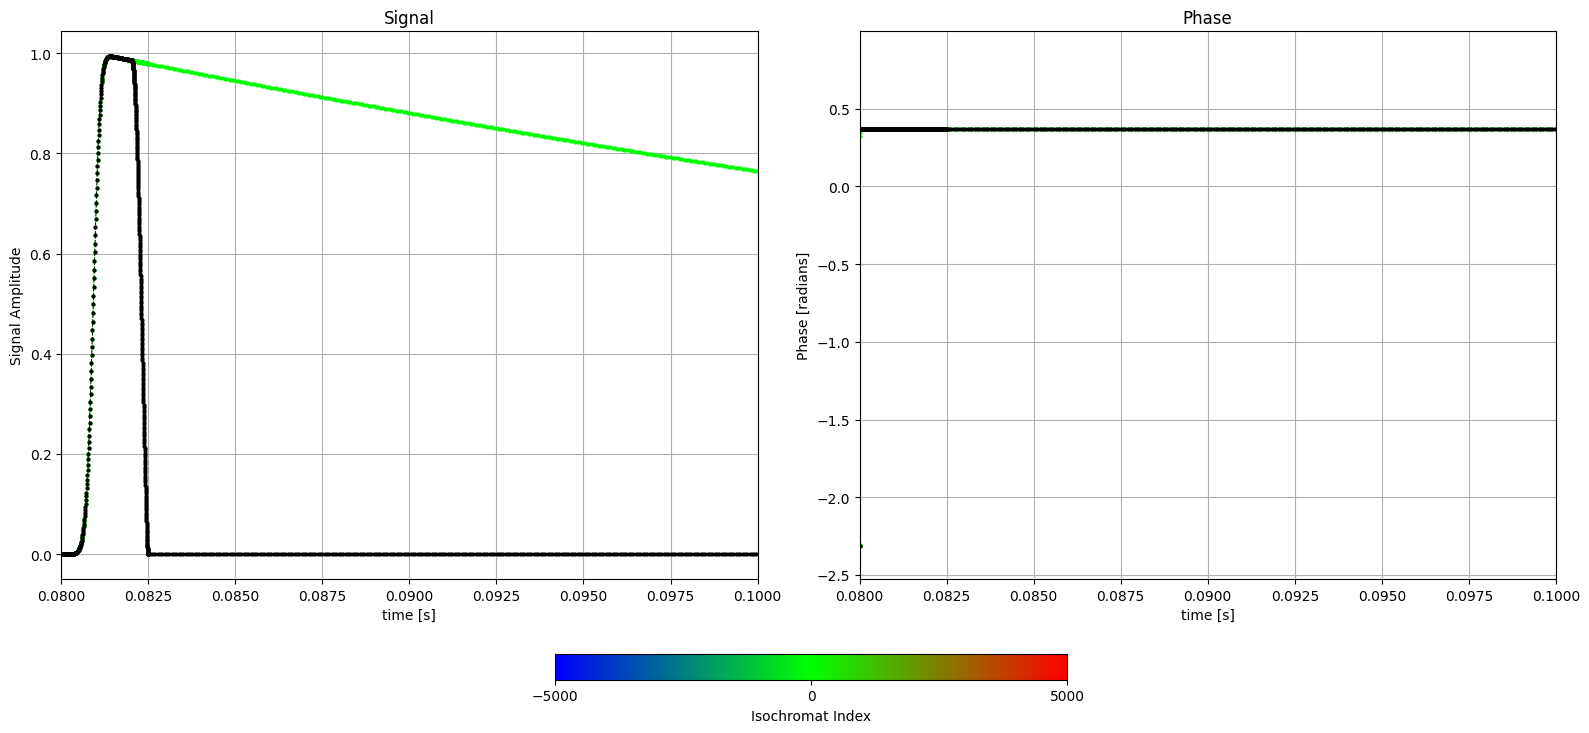

In [16]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim_minus.get_mag(return_cest_pool=False)


iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.0286, 0.0360]
# plt_range = [0.0675, 0.09]
# plt_range = [0.8275, 1.048] #wex
# plt_range = [0.08, 0.11]
plt_range = [0.08, 0.1]


# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_minus = np.abs(m_c_total)[-900:]

In [17]:
x_rf = np.arange(0, 2e-3, 2e-3/300)
x_spoil = np.arange(2e-3,2.5e-3, 0.5e-3/300) #0.5ms spoil
# x_spoil = np.arange(2e-3,3e-3, 1e-3/300) #1ms spoil
# x_adc = np.arange(2.5e-3, 5.5e-3, 3e-3/300) #3ms adc
x_adc = np.arange(2.5e-3, 22.5e-3, 20e-3/300) #200ms adc
# x_adc = np.arange(3e-3, 6e-3, 3e-3/300) #3ms adc


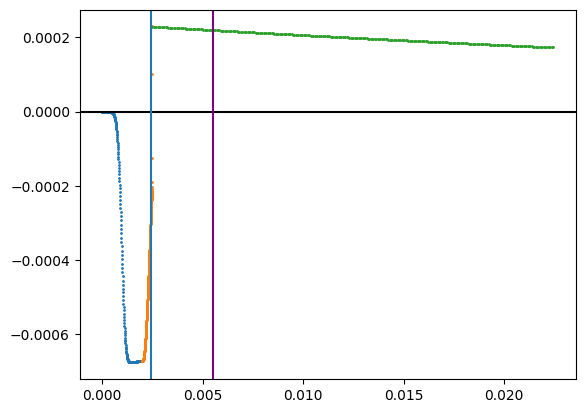

In [18]:
# plt.plot(x_spoil, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[:300])
# plt.plot(x_adc, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[300:])
plt.plot(x_rf,(m_trans_plus-m_trans_minus)[:300], 'o', markersize=1)
plt.plot(x_spoil,(m_trans_plus-m_trans_minus)[300:600], 'o', markersize=1)
plt.plot(x_adc,(m_trans_plus-m_trans_minus)[600:], 'o', markersize=1)
# plt.plot(x_rf,np.abs((m_trans_plus-m_trans_minus))[:300], 'o', markersize=1)
# plt.plot(x_spoil,np.abs((m_trans_plus-m_trans_minus))[300:600], 'o', markersize=1)
# plt.plot(x_adc,np.abs((m_trans_plus-m_trans_minus))[600:], 'o', markersize=1)
plt.axhline(0, c='black')
# plt.axhline(0.0055)
# plt.axvline(0.002476)

# plt.scatter(0.002476, 0.0055, c='b')

# plt.axhline(0.0295, color='r')
# plt.axvline(0.0025, color='r')

# plt.scatter(0.0025, 0.0295, c='r')

# plt.axhline(0.0006, color='g')
# plt.axvline(0.002482, color='g')

# plt.scatter(0.002475, 0.00026, c='g')

plt.axvline(0.0055, color='purple')
# plt.axvline(0.002485, color='purple')
# plt.scatter(0.002497, 0.000136, c='purple')

# plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
# plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
# plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

# plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
# plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
# plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')

plt.axvline(0.00241)

# plt.xlim(0.0024, 0.0026)
# plt.xlim(0.002, 0.006)
# plt.xlim(0.002, 0.006)
# plt.ylim(-0.0002, 0.00032)
# plt.ylim(-0.0002, 0.0003)
resulst = (m_trans_plus-m_trans_minus)
plt.show()

(0.0, 0.04)

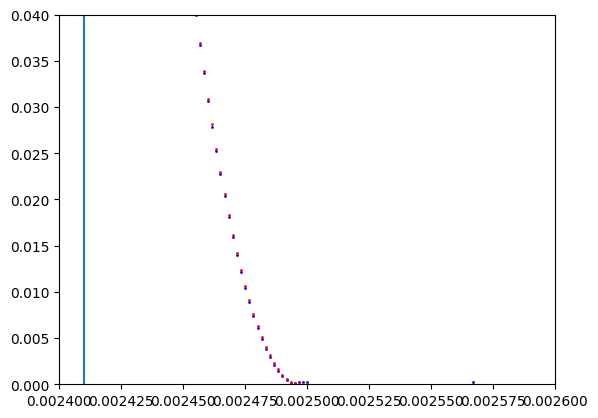

In [19]:
plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')
# plt.axhline(0, c='black')
plt.axvline(0.00241)
# plt.xlim(0.00235, 0.00245)
plt.xlim(0.0024, 0.0026)
plt.ylim(0, 0.04)

In [20]:
from bmc.utils.tex_variation import run_variation, _run_variation

# seq_on = ['seq_lib/10_ETM.seq']
# seq_off = ['seq_lib/10_ETM_minus.seq']


# _, signal_ten_ETM = run_variation(seq_on,
#                              seq_off,
#                              config_path,
#                              adc_time,
#                              z_pos,
#                              webhook,
#                              num_points = 1,
#                              batch_size=1,
#                              max_processes=1,
#                              save_to_file=False,
#                              show_plot=False)


In [21]:
# from bmc.utils.tex_variation import _run_variation
# import numpy as np
# import matplotlib.pyplot as plt

# seq_on = 'seq_lib/10_ETM.seq'
# seq_off = 'seq_lib/10_ETM_minus.seq'
# config_path = 'sim_lib/config_1pool.yaml'

# adc_time = 20e-3
# webhook = False

# low = -20e-6
# high = 20e-6 
# z_pos = [np.sort(np.append(np.linspace(low, high, n_iso), 0)) for n_iso in  range(1000, 12501, 2500)]

# for i in z_pos:
#     print(f'n_iso: {len(i)}')
#     _, _ = _run_variation(seq_on, seq_off, config_path, adc_time, i, webhook, show_plot=True)

n_iso: 1001


BMCTool simulation: 100%|██████████| 7/7 [00:13<00:00,  1.95s/it]


['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']


BMCTool simulation: 100%|██████████| 7/7 [00:14<00:00,  2.01s/it]


['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']


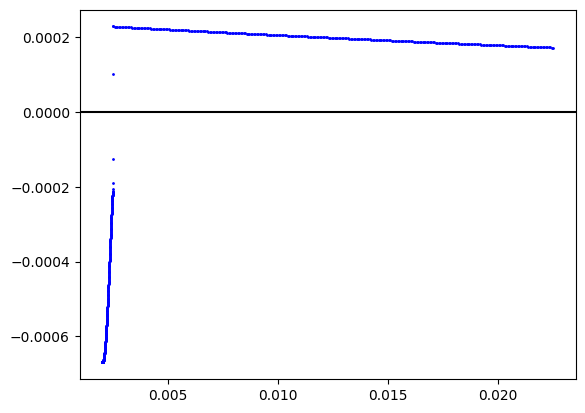

0.00022948618449500767


In [35]:
from bmc.utils.tex_variation import run_variation_parallel
import numpy as np
import matplotlib.pyplot as plt

seq_on = 'seq_lib/10_ETM.seq'
seq_off = 'seq_lib/10_ETM_minus.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 20e-3
webhook = False

low = -20e-6
high = 20e-6 
n_iso = 1000
z_pos = np.linspace(low, high, n_iso)
z_pos = np.append(z_pos, 0)
z_pos = np.sort(z_pos)

print(f'n_iso: {len(z_pos)}')
_, singal = run_variation_parallel(seq_on, seq_off, config_path, adc_time, z_pos, webhook, show_plot=True)
print(singal)

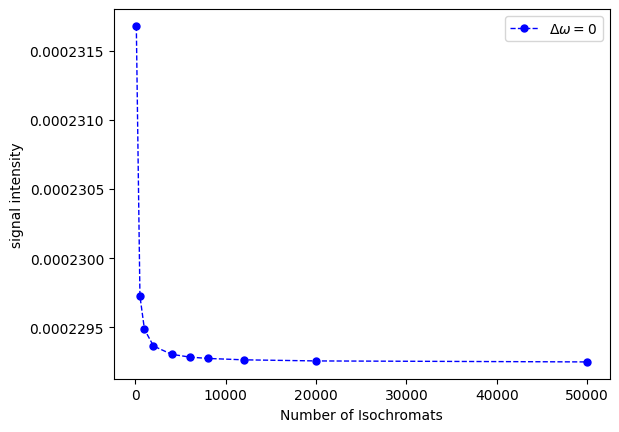

In [23]:
#%matplotlib widget

signal = np.array([
    0.00023167788178419377,
    0.0002297266899141397,
    0.00022948618449500767,
    0.00022936622278253106,
    0.0002293063150708914,
    0.0002292863566983889,
    0.00022927637954946146,
    0.00022926640375965323,
    0.00022925842411050505,
    0.00022925124317114663
])

n_iso = np.array([
    101,
    501,
    1001,
    2001,
    4001,
    6001,
    8001,
    12001,
    20001,
    50001
])

fig, ax = plt.subplots(dpi=100)

plt.plot(n_iso, signal, '--o', c='blue', linewidth=1, markersize=5, label=r'$\Delta\omega = 0$')
# plt.xscale('log')
ax.set_ylabel('signal intensity')
ax.set_xlabel('Number of Isochromats')
ax.legend()

# plt.savefig("results/signal_plot_iso.png", dpi=300, bbox_inches='tight')